# Neural Networks Regression with Tensorflow Project

### Madical Cost Personal Dataset

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Let's try one-hot encoding on our dataframe
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int32  
 5   sex_male          1338 non-null   int32  
 6   smoker_no         1338 non-null   int32  
 7   smoker_yes        1338 non-null   int32  
 8   region_northeast  1338 non-null   int32  
 9   region_northwest  1338 non-null   int32  
 10  region_southeast  1338 non-null   int32  
 11  region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 83.8 KB


In [8]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Create X and y datasets (features and labels)

In [9]:
insurance_one_hot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [10]:
insurance_one_hot = insurance_one_hot[['age', 'bmi', 'children', 'sex_female', 'sex_male',
                                       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
                                       'region_southeast', 'region_southwest', 'charges']]

In [11]:
insurance_one_hot.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520


In [63]:
# X, y = insurance_one_hot.iloc[:, :-1], insurance_one_hot.iloc[:, -1]

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot["charges"]

In [64]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   int32  
 4   sex_male          1338 non-null   int32  
 5   smoker_no         1338 non-null   int32  
 6   smoker_yes        1338 non-null   int32  
 7   region_northeast  1338 non-null   int32  
 8   region_northwest  1338 non-null   int32  
 9   region_southeast  1338 non-null   int32  
 10  region_southwest  1338 non-null   int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 73.3 KB


In [66]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Create training and test sets 

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
# len(X), (1338 / 100) * 80

In [74]:
# Split the data into train and test sets
# X_train = X[:1070]  # first 40 train samples (80% of the data)
# y_train = y[:1070]
# X_test = X[1070:]  # last 10 are testing samples (20% of the data)
# y_test = y[1070:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [76]:
len(X_train.columns)

11

### Building a neural network (sort of like model_2 in previous file)

### Model 6

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 8613.3008 - mae: 8613.3008
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7882.3608 - mae: 7882.3608
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7529.5771 - mae: 7529.5771
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7691.7236 - mae: 7691.7236
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 7675.1611 - mae: 7675.1611
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7560.3970 - mae: 7560.3970
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7530.9976 - mae: 7530.9976
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7722.9360 - mae: 7722.9360
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7607.3027 - mae: 7607.3027
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7657.6240 - mae: 7657.6240

In [88]:
# Check the results of the insurance data model
model_6.evaluate(X_test, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 8841.4932 - mae: 8841.4932


[8841.4931640625, 8841.4931640625]

In [87]:
model_6.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 10)                120       
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model 7

In [99]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_7.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 3s 5ms/step - loss: 13236.4395 - mae: 13236.4395
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13001.0518 - mae: 13001.0518
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12544.3525 - mae: 12544.3525
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 11718.4336 - mae: 11718.4336
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10460.3232 - mae: 10460.3232
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9016.5205 - mae: 9016.5205
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7875.0215 - mae: 7875.0215
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7488.6074 - mae: 7488.6074
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7434.5635 - mae: 7434.5635
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7414.9722 - mae:

In [100]:
# Evaluate the model
model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4751.3340 - mae: 4751.3340


[4751.333984375, 4751.333984375]

In [101]:
model_7.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 100)               1200      
                                                                 
 dense_74 (Dense)            (None, 10)                1010      
                                                                 
 dense_75 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 4s 5ms/step - loss: 13273.5322 - mae: 13273.5322
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13102.4688 - mae: 13102.4688
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12757.3652 - mae: 12757.3652
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12091.9082 - mae: 12091.9082
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10972.5684 - mae: 10972.5684
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9528.5156 - mae: 9528.5156
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8189.7681 - mae: 8189.7681
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7534.5747 - mae: 7534.5747
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7423.8462 - mae: 7423.8462
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7402.6377 - mae:

In [103]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 1s 9ms/step - loss: 3489.9094 - mae: 3489.9094


[3489.909423828125, 3489.909423828125]

In [104]:
model_1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 100)               1200      
                                                                 
 dense_77 (Dense)            (None, 10)                1010      
                                                                 
 dense_78 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'epochs')

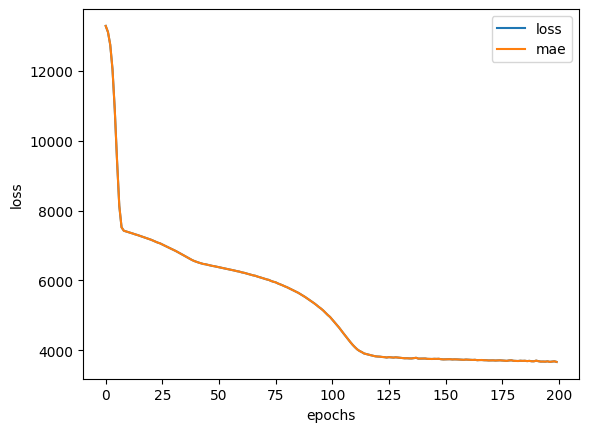

In [107]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")